In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

113


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.47431 stdev: 0.08435
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 74
Average adjusted fitness: 0.134
Mean genetic distance 2.879, standard deviation 0.499
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 13.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53454 stdev: 0.08243
Best fitness: 0.69944 - size: (2, 13) - species 6 - id 74
Average adjusted fitness: 0.174
Mean genetic distance 2.988, standard deviation 0.503
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 13.829 sec (13.842 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55143 stdev: 0.08086
Best fitness: 0.69944 - size: (2, 13) - species 6 - id 74
Average adjusted fitness: 0.225
Mean genetic distance 3.039, standard deviation 0.526
Population of 195 members in 26 species
T


 ****** Running generation 0 ****** 

Population's average fitness: 0.42965 stdev: 0.21530
Best fitness: 0.87755 - size: (2, 13) - species 4 - id 7
Average adjusted fitness: 0.260
Mean genetic distance 2.906, standard deviation 0.463
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.471 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60526 stdev: 0.20786
Best fitness: 0.87755 - size: (2, 13) - species 4 - id 7
Average adjusted fitness: 0.449
Mean genetic distance 3.040, standard deviation 0.479
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 19.409 sec (19.440 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66420 stdev: 0.20636
Best fitness: 0.87879 - size: (3, 13) - species 15 - id 529
Average adjusted fitness: 0.442
Mean genetic distance 3.085, standard deviation 0.472
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.585 sec (19.488 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47883 stdev: 0.09523
Best fitness: 0.76623 - size: (2, 13) - species 2 - id 8
Average adjusted fitness: 0.242
Mean genetic distance 2.846, standard deviation 0.498
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 23.838 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53646 stdev: 0.10629
Best fitness: 0.76623 - size: (2, 13) - species 8 - id 8
Average adjusted fitness: 0.255
Mean genetic distance 2.981, standard deviation 0.471
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 28.196 sec (26.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57578 stdev: 0.10886
Best fitness: 0.80087 - size: (3, 15) - species 19 - id 544
Average adjusted fitness: 0.237
Mean genetic distance 3.034, standard deviation 0.480
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 23.709 sec (25.247 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48981 stdev: 0.05648
Best fitness: 0.64440 - size: (2, 13) - species 3 - id 143
Average adjusted fitness: 0.145
Mean genetic distance 2.957, standard deviation 0.494
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.052 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52097 stdev: 0.05786
Best fitness: 0.69450 - size: (2, 13) - species 3 - id 376
Average adjusted fitness: 0.210
Mean genetic distance 2.990, standard deviation 0.523
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.405 sec (18.728 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53490 stdev: 0.07182
Best fitness: 0.69450 - size: (2, 13) - species 3 - id 376
Average adjusted fitness: 0.225
Mean genetic distance 3.025, standard deviation 0.504
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 19.837 sec (19.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.48713 stdev: 0.10095
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.226
Mean genetic distance 2.863, standard deviation 0.449
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.767 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54403 stdev: 0.10546
Best fitness: 0.77118 - size: (3, 15) - species 11 - id 380
Average adjusted fitness: 0.280
Mean genetic distance 2.928, standard deviation 0.481
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.200 sec (18.484 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58319 stdev: 0.09667
Best fitness: 0.77798 - size: (4, 17) - species 21 - id 459
Average adjusted fitness: 0.216
Mean genetic distance 3.037, standard deviation 0.497
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.505 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.53069 stdev: 0.09430
Best fitness: 0.71490 - size: (2, 13) - species 2 - id 59
Average adjusted fitness: 0.262
Mean genetic distance 2.930, standard deviation 0.495
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 17.876 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56043 stdev: 0.09131
Best fitness: 0.71800 - size: (3, 15) - species 25 - id 366
Average adjusted fitness: 0.236
Mean genetic distance 2.998, standard deviation 0.503
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.219 sec (18.548 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57282 stdev: 0.09019
Best fitness: 0.74273 - size: (4, 16) - species 24 - id 504
Average adjusted fitness: 0.256
Mean genetic distance 3.035, standard deviation 0.490
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.008 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48629 stdev: 0.08232
Best fitness: 0.66296 - size: (2, 13) - species 4 - id 149
Average adjusted fitness: 0.136
Mean genetic distance 2.887, standard deviation 0.474
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.595 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53453 stdev: 0.07609
Best fitness: 0.66296 - size: (2, 13) - species 4 - id 149
Average adjusted fitness: 0.162
Mean genetic distance 2.983, standard deviation 0.505
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.439 sec (19.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55039 stdev: 0.07220
Best fitness: 0.66296 - size: (2, 13) - species 19 - id 149
Average adjusted fitness: 0.194
Mean genetic distance 3.014, standard deviation 0.508
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.167 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45428 stdev: 0.10057
Best fitness: 0.77365 - size: (2, 13) - species 2 - id 166
Average adjusted fitness: 0.229
Mean genetic distance 2.810, standard deviation 0.486
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 18.176 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51747 stdev: 0.11107
Best fitness: 0.77365 - size: (2, 13) - species 8 - id 166
Average adjusted fitness: 0.187
Mean genetic distance 2.943, standard deviation 0.498
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 19.028 sec (18.602 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57083 stdev: 0.10940
Best fitness: 0.77365 - size: (2, 13) - species 8 - id 166
Average adjusted fitness: 0.232
Mean genetic distance 3.030, standard deviation 0.510
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 20.063 sec (19.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.46656 stdev: 0.15284
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 82
Average adjusted fitness: 0.196
Mean genetic distance 2.977, standard deviation 0.487
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 18.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54552 stdev: 0.15392
Best fitness: 0.79468 - size: (3, 14) - species 1 - id 352
Average adjusted fitness: 0.284
Mean genetic distance 3.033, standard deviation 0.493
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 19.502 sec (18.783 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57814 stdev: 0.15199
Best fitness: 0.79468 - size: (3, 14) - species 7 - id 352
Average adjusted fitness: 0.315
Mean genetic distance 3.108, standard deviation 0.485
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 19.805 sec (19.12


 ****** Running generation 0 ****** 

Population's average fitness: 0.44164 stdev: 0.15795
Best fitness: 0.76438 - size: (2, 13) - species 4 - id 42
Average adjusted fitness: 0.293
Mean genetic distance 2.892, standard deviation 0.511
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.169 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60312 stdev: 0.13716
Best fitness: 0.80396 - size: (2, 14) - species 2 - id 214
Average adjusted fitness: 0.355
Mean genetic distance 2.991, standard deviation 0.501
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.440 sec (18.805 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62715 stdev: 0.13199
Best fitness: 0.80829 - size: (2, 15) - species 16 - id 392
Average adjusted fitness: 0.347
Mean genetic distance 3.080, standard deviation 0.479
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 20.756 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49841 stdev: 0.06591
Best fitness: 0.73284 - size: (2, 13) - species 7 - id 134
Average adjusted fitness: 0.196
Mean genetic distance 2.847, standard deviation 0.439
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53529 stdev: 0.07242
Best fitness: 0.73284 - size: (2, 13) - species 7 - id 134
Average adjusted fitness: 0.264
Mean genetic distance 2.975, standard deviation 0.488
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.911 sec (19.370 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55602 stdev: 0.07929
Best fitness: 0.73779 - size: (3, 14) - species 18 - id 491
Average adjusted fitness: 0.263
Mean genetic distance 3.030, standard deviation 0.481
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.224 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.54258 stdev: 0.14518
Best fitness: 0.83488 - size: (2, 13) - species 3 - id 4
Average adjusted fitness: 0.302
Mean genetic distance 2.888, standard deviation 0.479
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.506 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60386 stdev: 0.14889
Best fitness: 0.83488 - size: (2, 13) - species 3 - id 4
Average adjusted fitness: 0.357
Mean genetic distance 3.009, standard deviation 0.484
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 19.264 sec (18.885 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64696 stdev: 0.12966
Best fitness: 0.84416 - size: (2, 14) - species 3 - id 547
Average adjusted fitness: 0.346
Mean genetic distance 3.080, standard deviation 0.480
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 20.280 sec (19.350 a


 ****** Running generation 0 ****** 

Population's average fitness: 0.51406 stdev: 0.07700
Best fitness: 0.68955 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.205
Mean genetic distance 2.941, standard deviation 0.491
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.534 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55746 stdev: 0.07667
Best fitness: 0.69017 - size: (2, 14) - species 7 - id 288
Average adjusted fitness: 0.220
Mean genetic distance 2.989, standard deviation 0.458
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.523 sec (19.028 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57137 stdev: 0.07723
Best fitness: 0.70872 - size: (2, 13) - species 20 - id 458
Average adjusted fitness: 0.247
Mean genetic distance 3.035, standard deviation 0.460
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 20.669 sec (19.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.48088 stdev: 0.08659
Best fitness: 0.67656 - size: (2, 13) - species 4 - id 31
Average adjusted fitness: 0.169
Mean genetic distance 2.845, standard deviation 0.498
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 18.440 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53747 stdev: 0.08369
Best fitness: 0.68955 - size: (3, 14) - species 2 - id 254
Average adjusted fitness: 0.218
Mean genetic distance 2.978, standard deviation 0.522
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.726 sec (19.083 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55876 stdev: 0.07770
Best fitness: 0.73840 - size: (4, 16) - species 8 - id 542
Average adjusted fitness: 0.236
Mean genetic distance 2.979, standard deviation 0.494
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 20.653 sec (19.60


 ****** Running generation 0 ****** 

Population's average fitness: 0.48731 stdev: 0.08544
Best fitness: 0.68831 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.117
Mean genetic distance 2.874, standard deviation 0.448
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52563 stdev: 0.08767
Best fitness: 0.70501 - size: (3, 15) - species 4 - id 247
Average adjusted fitness: 0.150
Mean genetic distance 2.861, standard deviation 0.465
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.634 sec (18.901 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55426 stdev: 0.09105
Best fitness: 0.72913 - size: (4, 15) - species 3 - id 527
Average adjusted fitness: 0.204
Mean genetic distance 2.889, standard deviation 0.510
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 20.281 sec (19.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.47712 stdev: 0.08202
Best fitness: 0.66790 - size: (2, 13) - species 1 - id 22
Average adjusted fitness: 0.174
Mean genetic distance 2.822, standard deviation 0.457
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.680 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54873 stdev: 0.08091
Best fitness: 0.70996 - size: (3, 14) - species 2 - id 244
Average adjusted fitness: 0.226
Mean genetic distance 2.991, standard deviation 0.492
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.738 sec (19.209 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56473 stdev: 0.08177
Best fitness: 0.71119 - size: (2, 13) - species 4 - id 455
Average adjusted fitness: 0.261
Mean genetic distance 3.045, standard deviation 0.478
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 20.945 sec (19.78


 ****** Running generation 0 ****** 

Population's average fitness: 0.45037 stdev: 0.20975
Best fitness: 0.80581 - size: (2, 13) - species 1 - id 79
Average adjusted fitness: 0.250
Mean genetic distance 2.895, standard deviation 0.471
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 18.248 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60651 stdev: 0.20678
Best fitness: 0.84416 - size: (3, 13) - species 13 - id 274
Average adjusted fitness: 0.380
Mean genetic distance 3.040, standard deviation 0.463
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.162 sec (19.205 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66288 stdev: 0.19676
Best fitness: 0.84416 - size: (3, 13) - species 13 - id 274
Average adjusted fitness: 0.465
Mean genetic distance 3.071, standard deviation 0.478
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 20.424 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47748 stdev: 0.09872
Best fitness: 0.71243 - size: (2, 13) - species 5 - id 16
Average adjusted fitness: 0.234
Mean genetic distance 2.931, standard deviation 0.476
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.346 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53270 stdev: 0.10591
Best fitness: 0.76500 - size: (3, 13) - species 18 - id 282
Average adjusted fitness: 0.305
Mean genetic distance 3.024, standard deviation 0.509
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.597 sec (19.972 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56803 stdev: 0.09665
Best fitness: 0.78912 - size: (4, 17) - species 16 - id 523
Average adjusted fitness: 0.220
Mean genetic distance 3.008, standard deviation 0.516
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.889 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47320 stdev: 0.08718
Best fitness: 0.71367 - size: (2, 13) - species 3 - id 195
Average adjusted fitness: 0.191
Mean genetic distance 2.874, standard deviation 0.461
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 18.577 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53052 stdev: 0.08866
Best fitness: 0.71923 - size: (3, 14) - species 3 - id 360
Average adjusted fitness: 0.236
Mean genetic distance 3.037, standard deviation 0.488
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.801 sec (19.189 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55220 stdev: 0.09167
Best fitness: 0.71923 - size: (3, 14) - species 3 - id 360
Average adjusted fitness: 0.243
Mean genetic distance 3.091, standard deviation 0.485
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 21.017 sec (19.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.47662 stdev: 0.09780
Best fitness: 0.69821 - size: (2, 13) - species 2 - id 87
Average adjusted fitness: 0.219
Mean genetic distance 2.838, standard deviation 0.466
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 18.781 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53564 stdev: 0.10056
Best fitness: 0.77304 - size: (3, 15) - species 5 - id 256
Average adjusted fitness: 0.280
Mean genetic distance 2.975, standard deviation 0.506
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 20.188 sec (19.485 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56664 stdev: 0.09419
Best fitness: 0.77304 - size: (3, 15) - species 1 - id 256
Average adjusted fitness: 0.213
Mean genetic distance 3.014, standard deviation 0.503
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 20.964 sec (19.97


 ****** Running generation 0 ****** 

Population's average fitness: 0.43988 stdev: 0.26270
Best fitness: 0.90291 - size: (2, 13) - species 4 - id 22
Average adjusted fitness: 0.294
Mean genetic distance 2.821, standard deviation 0.448
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 18.621 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61997 stdev: 0.26818
Best fitness: 0.90291 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.489
Mean genetic distance 2.953, standard deviation 0.464
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 20.302 sec (19.462 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68099 stdev: 0.25937
Best fitness: 0.90353 - size: (2, 13) - species 8 - id 455
Average adjusted fitness: 0.542
Mean genetic distance 3.023, standard deviation 0.469
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 20.759 sec (19.89


 ****** Running generation 0 ****** 

Population's average fitness: 0.50179 stdev: 0.05716
Best fitness: 0.68336 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.189
Mean genetic distance 2.945, standard deviation 0.457
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 18.237 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53157 stdev: 0.06049
Best fitness: 0.70501 - size: (3, 15) - species 6 - id 318
Average adjusted fitness: 0.150
Mean genetic distance 3.026, standard deviation 0.494
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 19.866 sec (19.051 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54306 stdev: 0.06327
Best fitness: 0.70934 - size: (4, 17) - species 8 - id 458
Average adjusted fitness: 0.168
Mean genetic distance 3.049, standard deviation 0.511
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 21.592 sec (19.89


 ****** Running generation 0 ****** 

Population's average fitness: 0.43162 stdev: 0.20127
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 195
Average adjusted fitness: 0.231
Mean genetic distance 2.834, standard deviation 0.438
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.494 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56797 stdev: 0.20698
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 195
Average adjusted fitness: 0.362
Mean genetic distance 2.906, standard deviation 0.462
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.781 sec (19.138 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65653 stdev: 0.18473
Best fitness: 0.86766 - size: (3, 14) - species 5 - id 488
Average adjusted fitness: 0.441
Mean genetic distance 2.949, standard deviation 0.455
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 20.629 sec (19.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.50699 stdev: 0.09427
Best fitness: 0.68584 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.257
Mean genetic distance 2.847, standard deviation 0.458
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 18.594 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56288 stdev: 0.08602
Best fitness: 0.74583 - size: (2, 14) - species 18 - id 352
Average adjusted fitness: 0.280
Mean genetic distance 2.922, standard deviation 0.490
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.643 sec (19.119 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58248 stdev: 0.08446
Best fitness: 0.74706 - size: (3, 15) - species 9 - id 528
Average adjusted fitness: 0.218
Mean genetic distance 2.932, standard deviation 0.475
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.654 sec (19.63


 ****** Running generation 0 ****** 

Population's average fitness: 0.53511 stdev: 0.13992
Best fitness: 0.72789 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.274
Mean genetic distance 2.941, standard deviation 0.549
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 18.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60098 stdev: 0.13535
Best fitness: 0.75510 - size: (3, 14) - species 6 - id 334
Average adjusted fitness: 0.285
Mean genetic distance 3.059, standard deviation 0.519
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.336 sec (19.593 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63217 stdev: 0.11708
Best fitness: 0.77056 - size: (4, 17) - species 10 - id 415
Average adjusted fitness: 0.341
Mean genetic distance 3.042, standard deviation 0.513
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 20.985 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.50293 stdev: 0.05354
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.167
Mean genetic distance 2.904, standard deviation 0.497
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.354 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52361 stdev: 0.06080
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.202
Mean genetic distance 3.041, standard deviation 0.483
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.185 sec (19.269 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54582 stdev: 0.06304
Best fitness: 0.70748 - size: (4, 18) - species 6 - id 489
Average adjusted fitness: 0.198
Mean genetic distance 3.123, standard deviation 0.481
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 20.863 sec (19.801


 ****** Running generation 0 ****** 

Population's average fitness: 0.50185 stdev: 0.05371
Best fitness: 0.68955 - size: (2, 13) - species 1 - id 118
Average adjusted fitness: 0.190
Mean genetic distance 2.907, standard deviation 0.479
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.733 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52520 stdev: 0.05967
Best fitness: 0.72233 - size: (3, 15) - species 2 - id 311
Average adjusted fitness: 0.141
Mean genetic distance 3.010, standard deviation 0.476
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.153 sec (20.443 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54657 stdev: 0.06602
Best fitness: 0.72665 - size: (4, 17) - species 19 - id 533
Average adjusted fitness: 0.128
Mean genetic distance 3.004, standard deviation 0.459
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.651 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.53385 stdev: 0.15504
Best fitness: 0.78726 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.341
Mean genetic distance 2.873, standard deviation 0.455
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 18.832 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61761 stdev: 0.13700
Best fitness: 0.84416 - size: (3, 15) - species 3 - id 268
Average adjusted fitness: 0.305
Mean genetic distance 3.005, standard deviation 0.476
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.895 sec (19.364 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62039 stdev: 0.15527
Best fitness: 0.84416 - size: (3, 15) - species 22 - id 268
Average adjusted fitness: 0.389
Mean genetic distance 3.013, standard deviation 0.473
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.386 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.52532 stdev: 0.08942
Best fitness: 0.68646 - size: (2, 13) - species 1 - id 138
Average adjusted fitness: 0.260
Mean genetic distance 2.907, standard deviation 0.462
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.170 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58102 stdev: 0.08230
Best fitness: 0.80272 - size: (3, 15) - species 2 - id 261
Average adjusted fitness: 0.202
Mean genetic distance 2.948, standard deviation 0.465
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 19.644 sec (19.407 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59266 stdev: 0.09626
Best fitness: 0.82498 - size: (3, 15) - species 11 - id 531
Average adjusted fitness: 0.268
Mean genetic distance 2.967, standard deviation 0.479
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.148 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49216 stdev: 0.06703
Best fitness: 0.69821 - size: (2, 13) - species 7 - id 199
Average adjusted fitness: 0.187
Mean genetic distance 2.864, standard deviation 0.480
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 19.567 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53381 stdev: 0.06365
Best fitness: 0.69944 - size: (2, 13) - species 1 - id 356
Average adjusted fitness: 0.187
Mean genetic distance 2.929, standard deviation 0.472
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 20.170 sec (19.868 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54611 stdev: 0.07629
Best fitness: 0.71490 - size: (2, 14) - species 10 - id 531
Average adjusted fitness: 0.247
Mean genetic distance 2.930, standard deviation 0.456
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 21.183 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51138 stdev: 0.09134
Best fitness: 0.68460 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.223
Mean genetic distance 2.846, standard deviation 0.454
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.901 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55812 stdev: 0.08565
Best fitness: 0.77304 - size: (3, 15) - species 2 - id 240
Average adjusted fitness: 0.231
Mean genetic distance 2.983, standard deviation 0.438
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 20.077 sec (19.489 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58660 stdev: 0.08240
Best fitness: 0.78664 - size: (3, 15) - species 2 - id 543
Average adjusted fitness: 0.212
Mean genetic distance 3.020, standard deviation 0.451
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 21.189 sec (20.05


 ****** Running generation 0 ****** 

Population's average fitness: 0.48733 stdev: 0.08629
Best fitness: 0.76129 - size: (2, 13) - species 3 - id 153
Average adjusted fitness: 0.173
Mean genetic distance 2.945, standard deviation 0.481
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.294 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52970 stdev: 0.08855
Best fitness: 0.76129 - size: (2, 13) - species 5 - id 153
Average adjusted fitness: 0.273
Mean genetic distance 3.039, standard deviation 0.458
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 20.123 sec (19.708 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55089 stdev: 0.08715
Best fitness: 0.76129 - size: (2, 13) - species 22 - id 153
Average adjusted fitness: 0.223
Mean genetic distance 3.059, standard deviation 0.467
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 21.257 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.53842 stdev: 0.14960
Best fitness: 0.75139 - size: (2, 13) - species 2 - id 15
Average adjusted fitness: 0.276
Mean genetic distance 2.929, standard deviation 0.485
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.128 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63512 stdev: 0.12488
Best fitness: 0.77551 - size: (2, 14) - species 6 - id 286
Average adjusted fitness: 0.315
Mean genetic distance 2.973, standard deviation 0.498
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.584 sec (19.856 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64204 stdev: 0.13069
Best fitness: 0.80025 - size: (3, 15) - species 15 - id 529
Average adjusted fitness: 0.379
Mean genetic distance 2.969, standard deviation 0.497
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 21.036 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.52124 stdev: 0.08759
Best fitness: 0.68584 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.223
Mean genetic distance 2.901, standard deviation 0.437
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56272 stdev: 0.08180
Best fitness: 0.78602 - size: (3, 13) - species 1 - id 354
Average adjusted fitness: 0.233
Mean genetic distance 3.016, standard deviation 0.465
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 19.704 sec (19.238 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58312 stdev: 0.07200
Best fitness: 0.78602 - size: (3, 13) - species 1 - id 354
Average adjusted fitness: 0.226
Mean genetic distance 3.021, standard deviation 0.457
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.396 sec (19.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.51624 stdev: 0.09053
Best fitness: 0.71738 - size: (2, 13) - species 2 - id 51
Average adjusted fitness: 0.275
Mean genetic distance 2.819, standard deviation 0.462
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 19.032 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56318 stdev: 0.09330
Best fitness: 0.75881 - size: (3, 15) - species 1 - id 289
Average adjusted fitness: 0.232
Mean genetic distance 2.918, standard deviation 0.505
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.317 sec (19.675 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57893 stdev: 0.10054
Best fitness: 0.77427 - size: (4, 15) - species 8 - id 490
Average adjusted fitness: 0.253
Mean genetic distance 2.930, standard deviation 0.510
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 21.307 sec (20.21


 ****** Running generation 0 ****** 

Population's average fitness: 0.46462 stdev: 0.14211
Best fitness: 0.74521 - size: (2, 13) - species 5 - id 56
Average adjusted fitness: 0.212
Mean genetic distance 3.014, standard deviation 0.515
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.096 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55018 stdev: 0.14466
Best fitness: 0.74521 - size: (2, 13) - species 5 - id 56
Average adjusted fitness: 0.239
Mean genetic distance 3.052, standard deviation 0.502
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.149 sec (19.623 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59127 stdev: 0.13043
Best fitness: 0.74521 - size: (2, 13) - species 26 - id 56
Average adjusted fitness: 0.292
Mean genetic distance 2.993, standard deviation 0.479
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 20.656 sec (19.967


 ****** Running generation 0 ****** 

Population's average fitness: 0.48354 stdev: 0.08209
Best fitness: 0.67965 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.185
Mean genetic distance 2.819, standard deviation 0.497
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.676 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53258 stdev: 0.08459
Best fitness: 0.70686 - size: (3, 15) - species 5 - id 382
Average adjusted fitness: 0.198
Mean genetic distance 2.925, standard deviation 0.494
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.716 sec (19.696 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55322 stdev: 0.08407
Best fitness: 0.70686 - size: (3, 15) - species 17 - id 382
Average adjusted fitness: 0.229
Mean genetic distance 3.036, standard deviation 0.504
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 21.043 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.43468 stdev: 0.21623
Best fitness: 0.83364 - size: (2, 13) - species 2 - id 186
Average adjusted fitness: 0.284
Mean genetic distance 2.819, standard deviation 0.481
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 18.956 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59539 stdev: 0.19427
Best fitness: 0.84787 - size: (2, 12) - species 1 - id 293
Average adjusted fitness: 0.419
Mean genetic distance 2.952, standard deviation 0.505
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 20.206 sec (19.581 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64111 stdev: 0.18292
Best fitness: 0.87199 - size: (3, 15) - species 12 - id 553
Average adjusted fitness: 0.434
Mean genetic distance 2.958, standard deviation 0.493
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 20.965 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49633 stdev: 0.08800
Best fitness: 0.68027 - size: (2, 13) - species 6 - id 171
Average adjusted fitness: 0.155
Mean genetic distance 2.948, standard deviation 0.471
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.564 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53131 stdev: 0.09337
Best fitness: 0.68522 - size: (3, 14) - species 22 - id 328
Average adjusted fitness: 0.193
Mean genetic distance 2.977, standard deviation 0.476
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.281 sec (19.422 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56300 stdev: 0.08582
Best fitness: 0.69264 - size: (2, 14) - species 21 - id 491
Average adjusted fitness: 0.245
Mean genetic distance 2.999, standard deviation 0.485
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.012 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.51234 stdev: 0.08144
Best fitness: 0.71552 - size: (2, 13) - species 3 - id 178
Average adjusted fitness: 0.259
Mean genetic distance 2.853, standard deviation 0.455
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.806 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53633 stdev: 0.07767
Best fitness: 0.73469 - size: (3, 15) - species 11 - id 274
Average adjusted fitness: 0.278
Mean genetic distance 2.989, standard deviation 0.473
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.902 sec (19.354 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56918 stdev: 0.08395
Best fitness: 0.76067 - size: (4, 17) - species 20 - id 408
Average adjusted fitness: 0.215
Mean genetic distance 3.044, standard deviation 0.482
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 20.654 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.55473 stdev: 0.15273
Best fitness: 0.78850 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.359
Mean genetic distance 2.980, standard deviation 0.504
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.333 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60809 stdev: 0.14443
Best fitness: 0.83364 - size: (3, 15) - species 14 - id 252
Average adjusted fitness: 0.387
Mean genetic distance 3.071, standard deviation 0.523
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 20.440 sec (19.886 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65147 stdev: 0.13296
Best fitness: 0.83364 - size: (3, 15) - species 14 - id 252
Average adjusted fitness: 0.388
Mean genetic distance 3.061, standard deviation 0.506
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 21.477 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50029 stdev: 0.07040
Best fitness: 0.78850 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.255
Mean genetic distance 2.853, standard deviation 0.459
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 19.240 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53870 stdev: 0.07181
Best fitness: 0.78850 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.168
Mean genetic distance 2.924, standard deviation 0.479
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.948 sec (19.594 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56080 stdev: 0.07431
Best fitness: 0.78850 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.182
Mean genetic distance 2.883, standard deviation 0.458
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 20.784 sec (19.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.49499 stdev: 0.05052
Best fitness: 0.63080 - size: (2, 13) - species 3 - id 87
Average adjusted fitness: 0.177
Mean genetic distance 2.853, standard deviation 0.485
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 19.498 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52911 stdev: 0.05845
Best fitness: 0.69264 - size: (2, 14) - species 7 - id 338
Average adjusted fitness: 0.116
Mean genetic distance 2.948, standard deviation 0.504
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 20.292 sec (19.895 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53800 stdev: 0.06110
Best fitness: 0.69264 - size: (2, 14) - species 18 - id 338
Average adjusted fitness: 0.179
Mean genetic distance 2.969, standard deviation 0.482
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.577 sec (20.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49937 stdev: 0.06295
Best fitness: 0.65306 - size: (2, 13) - species 2 - id 154
Average adjusted fitness: 0.197
Mean genetic distance 2.924, standard deviation 0.481
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.095 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53268 stdev: 0.06805
Best fitness: 0.70934 - size: (3, 14) - species 4 - id 282
Average adjusted fitness: 0.201
Mean genetic distance 2.961, standard deviation 0.491
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 20.221 sec (19.658 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54562 stdev: 0.06429
Best fitness: 0.70934 - size: (3, 14) - species 4 - id 282
Average adjusted fitness: 0.228
Mean genetic distance 2.996, standard deviation 0.488
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 20.973 sec (20.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.52315 stdev: 0.08998
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 133
Average adjusted fitness: 0.223
Mean genetic distance 2.904, standard deviation 0.489
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.724 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56783 stdev: 0.08580
Best fitness: 0.73469 - size: (2, 13) - species 4 - id 133
Average adjusted fitness: 0.249
Mean genetic distance 3.071, standard deviation 0.514
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 20.763 sec (19.744 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57495 stdev: 0.08982
Best fitness: 0.73469 - size: (2, 13) - species 22 - id 133
Average adjusted fitness: 0.266
Mean genetic distance 3.106, standard deviation 0.523
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.573 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49598 stdev: 0.04669
Best fitness: 0.63203 - size: (2, 13) - species 4 - id 41
Average adjusted fitness: 0.160
Mean genetic distance 2.861, standard deviation 0.436
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.426 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52119 stdev: 0.05161
Best fitness: 0.65553 - size: (3, 14) - species 15 - id 320
Average adjusted fitness: 0.143
Mean genetic distance 2.957, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.388 sec (19.907 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53500 stdev: 0.05513
Best fitness: 0.65553 - size: (3, 14) - species 1 - id 320
Average adjusted fitness: 0.130
Mean genetic distance 2.980, standard deviation 0.488
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 21.403 sec (20.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.47712 stdev: 0.08898
Best fitness: 0.72171 - size: (2, 13) - species 5 - id 187
Average adjusted fitness: 0.200
Mean genetic distance 2.914, standard deviation 0.456
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 18.839 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53831 stdev: 0.09588
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 187
Average adjusted fitness: 0.233
Mean genetic distance 3.042, standard deviation 0.497
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 20.688 sec (19.763 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56759 stdev: 0.09235
Best fitness: 0.72294 - size: (4, 16) - species 2 - id 482
Average adjusted fitness: 0.223
Mean genetic distance 3.129, standard deviation 0.531
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 21.538 sec (20.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.45633 stdev: 0.21293
Best fitness: 0.81447 - size: (2, 13) - species 8 - id 178
Average adjusted fitness: 0.268
Mean genetic distance 2.975, standard deviation 0.529
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.045 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57833 stdev: 0.20660
Best fitness: 0.82189 - size: (3, 14) - species 8 - id 314
Average adjusted fitness: 0.354
Mean genetic distance 3.039, standard deviation 0.502
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.192 sec (19.618 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61851 stdev: 0.20470
Best fitness: 0.83241 - size: (2, 14) - species 23 - id 505
Average adjusted fitness: 0.389
Mean genetic distance 3.079, standard deviation 0.476
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 21.648 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49957 stdev: 0.05169
Best fitness: 0.67161 - size: (2, 13) - species 2 - id 198
Average adjusted fitness: 0.155
Mean genetic distance 2.928, standard deviation 0.492
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.507 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53694 stdev: 0.06024
Best fitness: 0.69511 - size: (3, 15) - species 22 - id 338
Average adjusted fitness: 0.219
Mean genetic distance 3.031, standard deviation 0.488
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.383 sec (19.945 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53993 stdev: 0.06164
Best fitness: 0.69944 - size: (2, 13) - species 7 - id 502
Average adjusted fitness: 0.158
Mean genetic distance 3.029, standard deviation 0.489
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 20.574 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48840 stdev: 0.15220
Best fitness: 0.81076 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.268
Mean genetic distance 2.929, standard deviation 0.460
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.226 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54758 stdev: 0.14999
Best fitness: 0.81076 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.324
Mean genetic distance 3.004, standard deviation 0.455
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 20.435 sec (19.830 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58279 stdev: 0.14497
Best fitness: 0.82251 - size: (4, 17) - species 21 - id 463
Average adjusted fitness: 0.294
Mean genetic distance 3.021, standard deviation 0.449
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 21.943 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50170 stdev: 0.07457
Best fitness: 0.72665 - size: (2, 13) - species 2 - id 73
Average adjusted fitness: 0.271
Mean genetic distance 2.904, standard deviation 0.505
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 16.544 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53665 stdev: 0.08157
Best fitness: 0.74459 - size: (2, 14) - species 12 - id 267
Average adjusted fitness: 0.251
Mean genetic distance 3.032, standard deviation 0.465
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 17.691 sec (17.117 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55434 stdev: 0.08035
Best fitness: 0.74459 - size: (2, 14) - species 12 - id 267
Average adjusted fitness: 0.246
Mean genetic distance 3.046, standard deviation 0.477
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 18.512 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46503 stdev: 0.14679
Best fitness: 0.76809 - size: (2, 13) - species 2 - id 39
Average adjusted fitness: 0.268
Mean genetic distance 2.920, standard deviation 0.535
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 16.044 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57440 stdev: 0.13561
Best fitness: 0.76809 - size: (2, 13) - species 2 - id 39
Average adjusted fitness: 0.303
Mean genetic distance 2.976, standard deviation 0.529
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.087 sec (16.566 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59322 stdev: 0.13850
Best fitness: 0.76809 - size: (2, 13) - species 3 - id 39
Average adjusted fitness: 0.284
Mean genetic distance 2.963, standard deviation 0.523
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 17.516 sec (16.882 


 ****** Running generation 0 ****** 

Population's average fitness: 0.51369 stdev: 0.08589
Best fitness: 0.67347 - size: (2, 13) - species 7 - id 38
Average adjusted fitness: 0.188
Mean genetic distance 2.870, standard deviation 0.485
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 15.926 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54529 stdev: 0.08939
Best fitness: 0.70006 - size: (3, 15) - species 1 - id 363
Average adjusted fitness: 0.241
Mean genetic distance 2.926, standard deviation 0.477
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.153 sec (16.540 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56860 stdev: 0.07896
Best fitness: 0.70006 - size: (3, 15) - species 15 - id 363
Average adjusted fitness: 0.216
Mean genetic distance 2.974, standard deviation 0.461
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.807 sec (16.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.46501 stdev: 0.14966
Best fitness: 0.79221 - size: (2, 13) - species 2 - id 9
Average adjusted fitness: 0.270
Mean genetic distance 2.866, standard deviation 0.493
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 16.179 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56723 stdev: 0.13587
Best fitness: 0.79963 - size: (3, 14) - species 9 - id 353
Average adjusted fitness: 0.305
Mean genetic distance 3.026, standard deviation 0.496
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.175 sec (16.677 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56821 stdev: 0.15460
Best fitness: 0.81694 - size: (3, 15) - species 11 - id 490
Average adjusted fitness: 0.305
Mean genetic distance 3.060, standard deviation 0.499
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 17.798 sec (17.05


 ****** Running generation 0 ****** 

Population's average fitness: 0.55260 stdev: 0.14421
Best fitness: 0.75819 - size: (2, 13) - species 2 - id 66
Average adjusted fitness: 0.294
Mean genetic distance 2.882, standard deviation 0.473
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 16.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60912 stdev: 0.12808
Best fitness: 0.76623 - size: (2, 14) - species 5 - id 333
Average adjusted fitness: 0.309
Mean genetic distance 3.037, standard deviation 0.500
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.251 sec (16.737 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62887 stdev: 0.11934
Best fitness: 0.76747 - size: (3, 16) - species 2 - id 523
Average adjusted fitness: 0.322
Mean genetic distance 3.054, standard deviation 0.508
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 17.675 sec (17.05


 ****** Running generation 0 ****** 

Population's average fitness: 0.52274 stdev: 0.08897
Best fitness: 0.69388 - size: (2, 13) - species 6 - id 158
Average adjusted fitness: 0.184
Mean genetic distance 2.906, standard deviation 0.507
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 15.934 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55703 stdev: 0.08103
Best fitness: 0.69388 - size: (2, 13) - species 6 - id 158
Average adjusted fitness: 0.233
Mean genetic distance 2.978, standard deviation 0.479
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 17.082 sec (16.508 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56377 stdev: 0.09081
Best fitness: 0.70810 - size: (4, 16) - species 18 - id 494
Average adjusted fitness: 0.204
Mean genetic distance 3.037, standard deviation 0.461
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 18.098 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50425 stdev: 0.06339
Best fitness: 0.71429 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.203
Mean genetic distance 2.882, standard deviation 0.496
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 17.986 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53765 stdev: 0.05709
Best fitness: 0.71429 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.142
Mean genetic distance 2.977, standard deviation 0.487
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.429 sec (18.707 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54560 stdev: 0.07036
Best fitness: 0.72789 - size: (4, 17) - species 14 - id 518
Average adjusted fitness: 0.216
Mean genetic distance 3.053, standard deviation 0.476
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 20.400 sec (19.27


 ****** Running generation 0 ****** 

Population's average fitness: 0.50787 stdev: 0.06014
Best fitness: 0.70315 - size: (2, 13) - species 2 - id 130
Average adjusted fitness: 0.225
Mean genetic distance 2.971, standard deviation 0.477
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 16.194 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52649 stdev: 0.06963
Best fitness: 0.72171 - size: (2, 14) - species 6 - id 376
Average adjusted fitness: 0.267
Mean genetic distance 3.073, standard deviation 0.474
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 17.433 sec (16.813 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55307 stdev: 0.07342
Best fitness: 0.72604 - size: (3, 14) - species 2 - id 499
Average adjusted fitness: 0.216
Mean genetic distance 3.046, standard deviation 0.475
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 17.869 sec (17.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50358 stdev: 0.06287
Best fitness: 0.71119 - size: (2, 13) - species 7 - id 103
Average adjusted fitness: 0.200
Mean genetic distance 2.884, standard deviation 0.461
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 16.049 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54614 stdev: 0.07302
Best fitness: 0.75448 - size: (2, 13) - species 8 - id 381
Average adjusted fitness: 0.184
Mean genetic distance 2.965, standard deviation 0.480
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.375 sec (16.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55690 stdev: 0.07127
Best fitness: 0.75448 - size: (2, 13) - species 8 - id 381
Average adjusted fitness: 0.147
Mean genetic distance 3.032, standard deviation 0.476
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 17.873 sec (17.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.47586 stdev: 0.14869
Best fitness: 0.79406 - size: (2, 13) - species 1 - id 77
Average adjusted fitness: 0.200
Mean genetic distance 2.876, standard deviation 0.495
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 15.915 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56269 stdev: 0.14241
Best fitness: 0.79406 - size: (2, 13) - species 7 - id 77
Average adjusted fitness: 0.264
Mean genetic distance 3.021, standard deviation 0.519
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.098 sec (16.506 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58172 stdev: 0.14345
Best fitness: 0.79406 - size: (2, 13) - species 7 - id 77
Average adjusted fitness: 0.288
Mean genetic distance 3.061, standard deviation 0.494
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.061 sec (17.024 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48670 stdev: 0.08930
Best fitness: 0.69079 - size: (2, 13) - species 7 - id 142
Average adjusted fitness: 0.170
Mean genetic distance 2.873, standard deviation 0.449
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 15.952 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53886 stdev: 0.08751
Best fitness: 0.73469 - size: (2, 14) - species 3 - id 230
Average adjusted fitness: 0.172
Mean genetic distance 2.943, standard deviation 0.460
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.131 sec (16.541 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56553 stdev: 0.08513
Best fitness: 0.73593 - size: (4, 17) - species 1 - id 469
Average adjusted fitness: 0.234
Mean genetic distance 3.013, standard deviation 0.450
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 17.842 sec (16.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.48043 stdev: 0.15894
Best fitness: 0.74583 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.271
Mean genetic distance 2.842, standard deviation 0.442
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 16.527 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56294 stdev: 0.15720
Best fitness: 0.77118 - size: (3, 14) - species 17 - id 338
Average adjusted fitness: 0.342
Mean genetic distance 2.907, standard deviation 0.470
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 17.398 sec (16.963 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59789 stdev: 0.14517
Best fitness: 0.78108 - size: (3, 15) - species 2 - id 523
Average adjusted fitness: 0.345
Mean genetic distance 2.977, standard deviation 0.507
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 18.236 sec (17.3


Population's average fitness: 0.49616 stdev: 0.05061
Best fitness: 0.66790 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.139
Mean genetic distance 2.910, standard deviation 0.468
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 15.857 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52887 stdev: 0.05942
Best fitness: 0.75387 - size: (3, 15) - species 24 - id 354
Average adjusted fitness: 0.154
Mean genetic distance 2.950, standard deviation 0.472
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.112 sec (16.484 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54981 stdev: 0.06483
Best fitness: 0.75387 - size: (3, 15) - species 24 - id 354
Average adjusted fitness: 0.178
Mean genetic distance 3.014, standard deviation 0.501
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 17.896 sec (16.955 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.44325 stdev: 0.13400
Best fitness: 0.73779 - size: (2, 13) - species 3 - id 130
Average adjusted fitness: 0.158
Mean genetic distance 2.936, standard deviation 0.484
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 16.059 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54750 stdev: 0.14525
Best fitness: 0.74954 - size: (2, 13) - species 17 - id 375
Average adjusted fitness: 0.275
Mean genetic distance 3.076, standard deviation 0.509
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 17.213 sec (16.636 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59393 stdev: 0.13915
Best fitness: 0.75201 - size: (3, 15) - species 1 - id 517
Average adjusted fitness: 0.352
Mean genetic distance 3.091, standard deviation 0.496
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 18.035 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49337 stdev: 0.10277
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 126
Average adjusted fitness: 0.274
Mean genetic distance 2.927, standard deviation 0.477
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 16.022 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53369 stdev: 0.10840
Best fitness: 0.80458 - size: (2, 13) - species 4 - id 260
Average adjusted fitness: 0.237
Mean genetic distance 2.990, standard deviation 0.496
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 17.100 sec (16.561 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56746 stdev: 0.10761
Best fitness: 0.80458 - size: (2, 13) - species 4 - id 260
Average adjusted fitness: 0.257
Mean genetic distance 3.015, standard deviation 0.487
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 18.290 sec (17.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.47898 stdev: 0.09320
Best fitness: 0.69573 - size: (2, 13) - species 3 - id 104
Average adjusted fitness: 0.210
Mean genetic distance 2.936, standard deviation 0.493
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53306 stdev: 0.09171
Best fitness: 0.69944 - size: (3, 14) - species 2 - id 326
Average adjusted fitness: 0.258
Mean genetic distance 3.024, standard deviation 0.494
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.563 sec (17.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56643 stdev: 0.09083
Best fitness: 0.70934 - size: (2, 11) - species 5 - id 410
Average adjusted fitness: 0.242
Mean genetic distance 3.040, standard deviation 0.486
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.411 sec (18.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49845 stdev: 0.06041
Best fitness: 0.69450 - size: (2, 13) - species 3 - id 93
Average adjusted fitness: 0.214
Mean genetic distance 2.932, standard deviation 0.509
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 17.063 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52574 stdev: 0.06673
Best fitness: 0.71490 - size: (3, 15) - species 10 - id 366
Average adjusted fitness: 0.226
Mean genetic distance 3.036, standard deviation 0.518
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 18.190 sec (17.626 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54296 stdev: 0.07085
Best fitness: 0.72480 - size: (3, 15) - species 4 - id 528
Average adjusted fitness: 0.209
Mean genetic distance 3.104, standard deviation 0.519
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 21.853 sec (19.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.48687 stdev: 0.07889
Best fitness: 0.67223 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.160
Mean genetic distance 2.880, standard deviation 0.497
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 18.496 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52782 stdev: 0.08072
Best fitness: 0.70068 - size: (3, 15) - species 2 - id 352
Average adjusted fitness: 0.156
Mean genetic distance 3.016, standard deviation 0.521
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 19.885 sec (19.191 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54895 stdev: 0.08187
Best fitness: 0.71429 - size: (3, 15) - species 14 - id 552
Average adjusted fitness: 0.238
Mean genetic distance 3.127, standard deviation 0.509
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 21.087 sec (19.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.52744 stdev: 0.15921
Best fitness: 0.83735 - size: (2, 13) - species 1 - id 31
Average adjusted fitness: 0.341
Mean genetic distance 2.837, standard deviation 0.433
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.271 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61122 stdev: 0.14152
Best fitness: 0.83735 - size: (2, 13) - species 1 - id 31
Average adjusted fitness: 0.412
Mean genetic distance 2.932, standard deviation 0.451
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.037 sec (17.654 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63075 stdev: 0.14701
Best fitness: 0.83859 - size: (3, 16) - species 18 - id 393
Average adjusted fitness: 0.403
Mean genetic distance 2.927, standard deviation 0.453
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.551 sec (18.28


 ****** Running generation 0 ****** 

Population's average fitness: 0.50156 stdev: 0.04768
Best fitness: 0.62956 - size: (2, 13) - species 4 - id 10
Average adjusted fitness: 0.149
Mean genetic distance 2.842, standard deviation 0.480
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.191 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52172 stdev: 0.04794
Best fitness: 0.63698 - size: (3, 14) - species 6 - id 216
Average adjusted fitness: 0.147
Mean genetic distance 2.937, standard deviation 0.470
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.809 sec (19.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52655 stdev: 0.04939
Best fitness: 0.64564 - size: (4, 16) - species 22 - id 433
Average adjusted fitness: 0.106
Mean genetic distance 3.008, standard deviation 0.468
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 21.803 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.44369 stdev: 0.20841
Best fitness: 0.80334 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.237
Mean genetic distance 2.870, standard deviation 0.453
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.799 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58102 stdev: 0.21244
Best fitness: 0.81262 - size: (3, 15) - species 8 - id 329
Average adjusted fitness: 0.377
Mean genetic distance 2.972, standard deviation 0.463
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 21.176 sec (19.988 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65065 stdev: 0.18700
Best fitness: 0.81756 - size: (3, 16) - species 6 - id 446
Average adjusted fitness: 0.418
Mean genetic distance 3.032, standard deviation 0.499
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 19.529 sec (19.835


 ****** Running generation 0 ****** 

Population's average fitness: 0.47360 stdev: 0.09928
Best fitness: 0.73284 - size: (2, 13) - species 3 - id 49
Average adjusted fitness: 0.234
Mean genetic distance 2.881, standard deviation 0.494
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 21.044 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55325 stdev: 0.09433
Best fitness: 0.73284 - size: (2, 13) - species 8 - id 49
Average adjusted fitness: 0.223
Mean genetic distance 3.000, standard deviation 0.481
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 29.633 sec (25.338 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55653 stdev: 0.10001
Best fitness: 0.75881 - size: (3, 16) - species 9 - id 518
Average adjusted fitness: 0.303
Mean genetic distance 3.014, standard deviation 0.478
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 31.330 sec (27.336


 ****** Running generation 0 ****** 

Population's average fitness: 0.46273 stdev: 0.15184
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 53
Average adjusted fitness: 0.221
Mean genetic distance 2.914, standard deviation 0.465
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.034 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57704 stdev: 0.13820
Best fitness: 0.74026 - size: (2, 13) - species 4 - id 53
Average adjusted fitness: 0.319
Mean genetic distance 3.000, standard deviation 0.479
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 25.975 sec (23.004 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60078 stdev: 0.12614
Best fitness: 0.75758 - size: (4, 17) - species 8 - id 415
Average adjusted fitness: 0.319
Mean genetic distance 3.049, standard deviation 0.488
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 24.301 sec (23.436


 ****** Running generation 0 ****** 

Population's average fitness: 0.53846 stdev: 0.14722
Best fitness: 0.79035 - size: (2, 13) - species 6 - id 97
Average adjusted fitness: 0.313
Mean genetic distance 2.962, standard deviation 0.515
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 22.653 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61119 stdev: 0.14019
Best fitness: 0.80891 - size: (3, 14) - species 21 - id 368
Average adjusted fitness: 0.405
Mean genetic distance 3.029, standard deviation 0.532
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 29.814 sec (26.233 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64162 stdev: 0.12389
Best fitness: 0.80891 - size: (3, 14) - species 21 - id 368
Average adjusted fitness: 0.355
Mean genetic distance 3.072, standard deviation 0.551
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 29.803 sec (27.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51369 stdev: 0.09404
Best fitness: 0.71861 - size: (2, 13) - species 7 - id 87
Average adjusted fitness: 0.208
Mean genetic distance 2.936, standard deviation 0.526
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 31.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57831 stdev: 0.08689
Best fitness: 0.76438 - size: (2, 14) - species 7 - id 317
Average adjusted fitness: 0.312
Mean genetic distance 3.001, standard deviation 0.533
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 36.182 sec (34.084 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58576 stdev: 0.09303
Best fitness: 0.76438 - size: (2, 14) - species 7 - id 317
Average adjusted fitness: 0.287
Mean genetic distance 3.053, standard deviation 0.531
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 25.507 sec (31.22


 ****** Running generation 0 ****** 

Population's average fitness: 0.46815 stdev: 0.09763
Best fitness: 0.70996 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.206
Mean genetic distance 2.922, standard deviation 0.518
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.902 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54809 stdev: 0.09112
Best fitness: 0.73531 - size: (3, 14) - species 7 - id 216
Average adjusted fitness: 0.202
Mean genetic distance 3.047, standard deviation 0.517
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 24.172 sec (22.537 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55897 stdev: 0.10046
Best fitness: 0.74273 - size: (3, 14) - species 3 - id 492
Average adjusted fitness: 0.257
Mean genetic distance 3.147, standard deviation 0.491
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 22.932 sec (22.66


 ****** Running generation 0 ****** 

Population's average fitness: 0.43873 stdev: 0.21166
Best fitness: 0.80705 - size: (2, 13) - species 2 - id 24
Average adjusted fitness: 0.284
Mean genetic distance 2.857, standard deviation 0.482
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 21.931 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57591 stdev: 0.21093
Best fitness: 0.82746 - size: (3, 14) - species 8 - id 264
Average adjusted fitness: 0.423
Mean genetic distance 2.924, standard deviation 0.487
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 24.276 sec (23.104 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65200 stdev: 0.18950
Best fitness: 0.84787 - size: (3, 14) - species 8 - id 549
Average adjusted fitness: 0.447
Mean genetic distance 2.943, standard deviation 0.490
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 22.019 sec (22.74


 ****** Running generation 0 ****** 

Population's average fitness: 0.47406 stdev: 0.09509
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 72
Average adjusted fitness: 0.241
Mean genetic distance 2.878, standard deviation 0.468
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 22.271 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52482 stdev: 0.09528
Best fitness: 0.78541 - size: (2, 13) - species 3 - id 72
Average adjusted fitness: 0.260
Mean genetic distance 3.026, standard deviation 0.476
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 22.750 sec (22.510 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54917 stdev: 0.09887
Best fitness: 0.78541 - size: (2, 13) - species 3 - id 72
Average adjusted fitness: 0.228
Mean genetic distance 3.085, standard deviation 0.505
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 25.800 sec (23.607 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50829 stdev: 0.08756
Best fitness: 0.66976 - size: (2, 13) - species 5 - id 151
Average adjusted fitness: 0.177
Mean genetic distance 2.937, standard deviation 0.479
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 26.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54816 stdev: 0.08634
Best fitness: 0.71923 - size: (3, 14) - species 16 - id 322
Average adjusted fitness: 0.219
Mean genetic distance 3.033, standard deviation 0.501
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 25.293 sec (26.029 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58061 stdev: 0.07866
Best fitness: 0.73408 - size: (3, 15) - species 14 - id 410
Average adjusted fitness: 0.204
Mean genetic distance 3.051, standard deviation 0.485
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 24.421 sec (25


 ****** Running generation 0 ****** 

Population's average fitness: 0.50235 stdev: 0.06910
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.196
Mean genetic distance 2.903, standard deviation 0.470
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 23.005 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53634 stdev: 0.07347
Best fitness: 0.77922 - size: (2, 13) - species 8 - id 28
Average adjusted fitness: 0.290
Mean genetic distance 3.012, standard deviation 0.467
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 23.858 sec (23.431 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55126 stdev: 0.07659
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.186
Mean genetic distance 3.020, standard deviation 0.461
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 22.476 sec (23.113 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46688 stdev: 0.10152
Best fitness: 0.74583 - size: (2, 13) - species 3 - id 125
Average adjusted fitness: 0.210
Mean genetic distance 2.890, standard deviation 0.466
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 33.217 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54269 stdev: 0.10155
Best fitness: 0.75634 - size: (3, 15) - species 2 - id 354
Average adjusted fitness: 0.290
Mean genetic distance 3.033, standard deviation 0.479
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 37.798 sec (35.508 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54984 stdev: 0.10646
Best fitness: 0.75634 - size: (3, 15) - species 23 - id 354
Average adjusted fitness: 0.291
Mean genetic distance 3.049, standard deviation 0.481
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 38.921 sec (36.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44345 stdev: 0.15365
Best fitness: 0.74150 - size: (2, 13) - species 4 - id 74
Average adjusted fitness: 0.266
Mean genetic distance 2.876, standard deviation 0.467
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 28.575 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57024 stdev: 0.15550
Best fitness: 0.76252 - size: (2, 14) - species 17 - id 377
Average adjusted fitness: 0.350
Mean genetic distance 2.939, standard deviation 0.502
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 29.599 sec (29.087 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59630 stdev: 0.15556
Best fitness: 0.77922 - size: (3, 15) - species 17 - id 528
Average adjusted fitness: 0.386
Mean genetic distance 2.962, standard deviation 0.481
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 30.466 sec (29.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48028 stdev: 0.08623
Best fitness: 0.68707 - size: (2, 13) - species 2 - id 138
Average adjusted fitness: 0.178
Mean genetic distance 2.821, standard deviation 0.465
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 29.150 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53790 stdev: 0.08355
Best fitness: 0.70130 - size: (2, 13) - species 8 - id 349
Average adjusted fitness: 0.298
Mean genetic distance 2.955, standard deviation 0.476
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 29.465 sec (29.307 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55470 stdev: 0.08119
Best fitness: 0.70130 - size: (2, 13) - species 8 - id 349
Average adjusted fitness: 0.217
Mean genetic distance 2.987, standard deviation 0.477
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 31.126 sec (29.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.48002 stdev: 0.09133
Best fitness: 0.65615 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.160
Mean genetic distance 2.877, standard deviation 0.472
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 26.659 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53886 stdev: 0.08614
Best fitness: 0.70006 - size: (2, 13) - species 3 - id 316
Average adjusted fitness: 0.200
Mean genetic distance 2.977, standard deviation 0.488
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 30.670 sec (28.664 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54805 stdev: 0.09082
Best fitness: 0.72418 - size: (2, 14) - species 2 - id 488
Average adjusted fitness: 0.170
Mean genetic distance 3.032, standard deviation 0.500
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 30.163 sec (29.16


 ****** Running generation 0 ****** 

Population's average fitness: 0.52839 stdev: 0.14581
Best fitness: 0.77737 - size: (2, 13) - species 2 - id 96
Average adjusted fitness: 0.315
Mean genetic distance 2.890, standard deviation 0.483
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 21.450 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61332 stdev: 0.12771
Best fitness: 0.77737 - size: (2, 13) - species 2 - id 96
Average adjusted fitness: 0.381
Mean genetic distance 2.924, standard deviation 0.484
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 25.139 sec (23.295 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63367 stdev: 0.13299
Best fitness: 0.80767 - size: (4, 18) - species 18 - id 476
Average adjusted fitness: 0.331
Mean genetic distance 2.962, standard deviation 0.497
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 24.694 sec (23.76


 ****** Running generation 0 ****** 

Population's average fitness: 0.50113 stdev: 0.04518
Best fitness: 0.72047 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.174
Mean genetic distance 2.870, standard deviation 0.497
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.342 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52191 stdev: 0.05243
Best fitness: 0.72047 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.111
Mean genetic distance 2.995, standard deviation 0.513
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 22.875 sec (21.609 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53961 stdev: 0.06366
Best fitness: 0.73964 - size: (4, 15) - species 4 - id 481
Average adjusted fitness: 0.142
Mean genetic distance 3.057, standard deviation 0.503
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 24.903 sec (22.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.51285 stdev: 0.08964
Best fitness: 0.68336 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.237
Mean genetic distance 2.935, standard deviation 0.467
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 27.174 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55990 stdev: 0.08205
Best fitness: 0.71058 - size: (3, 15) - species 4 - id 385
Average adjusted fitness: 0.240
Mean genetic distance 3.011, standard deviation 0.457
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 27.805 sec (27.489 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58010 stdev: 0.07730
Best fitness: 0.71058 - size: (3, 15) - species 4 - id 385
Average adjusted fitness: 0.233
Mean genetic distance 3.012, standard deviation 0.455
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 28.175 sec (27.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.55353 stdev: 0.14856
Best fitness: 0.77304 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.372
Mean genetic distance 3.053, standard deviation 0.521
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.558 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63080 stdev: 0.11756
Best fitness: 0.78479 - size: (3, 13) - species 2 - id 369
Average adjusted fitness: 0.375
Mean genetic distance 3.086, standard deviation 0.524
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 23.790 sec (22.674 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63521 stdev: 0.11694
Best fitness: 0.78479 - size: (3, 13) - species 28 - id 369
Average adjusted fitness: 0.346
Mean genetic distance 3.063, standard deviation 0.507
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 23.796 sec (23.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.50622 stdev: 0.09060
Best fitness: 0.70996 - size: (2, 13) - species 1 - id 19
Average adjusted fitness: 0.206
Mean genetic distance 2.870, standard deviation 0.489
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.480 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55802 stdev: 0.08359
Best fitness: 0.72604 - size: (3, 15) - species 20 - id 385
Average adjusted fitness: 0.251
Mean genetic distance 3.001, standard deviation 0.507
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.225 sec (17.853 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58184 stdev: 0.07326
Best fitness: 0.73655 - size: (2, 14) - species 17 - id 480
Average adjusted fitness: 0.295
Mean genetic distance 3.037, standard deviation 0.516
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.307 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50249 stdev: 0.06883
Best fitness: 0.73531 - size: (2, 13) - species 2 - id 104
Average adjusted fitness: 0.208
Mean genetic distance 2.930, standard deviation 0.495
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.300 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54171 stdev: 0.07201
Best fitness: 0.73531 - size: (2, 13) - species 2 - id 104
Average adjusted fitness: 0.151
Mean genetic distance 3.021, standard deviation 0.487
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.006 sec (17.653 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56078 stdev: 0.08000
Best fitness: 0.73531 - size: (2, 13) - species 26 - id 104
Average adjusted fitness: 0.169
Mean genetic distance 3.035, standard deviation 0.491
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.077 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50082 stdev: 0.06140
Best fitness: 0.68275 - size: (2, 13) - species 1 - id 143
Average adjusted fitness: 0.165
Mean genetic distance 2.941, standard deviation 0.493
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.404 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53985 stdev: 0.06121
Best fitness: 0.70068 - size: (2, 13) - species 13 - id 275
Average adjusted fitness: 0.166
Mean genetic distance 3.005, standard deviation 0.483
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 18.593 sec (17.999 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55919 stdev: 0.06357
Best fitness: 0.71676 - size: (4, 16) - species 14 - id 486
Average adjusted fitness: 0.150
Mean genetic distance 3.007, standard deviation 0.494
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.492 sec (18


 ****** Running generation 0 ****** 

Population's average fitness: 0.51861 stdev: 0.08754
Best fitness: 0.70996 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.224
Mean genetic distance 2.901, standard deviation 0.496
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 16.717 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56534 stdev: 0.07995
Best fitness: 0.76314 - size: (2, 13) - species 8 - id 320
Average adjusted fitness: 0.261
Mean genetic distance 2.989, standard deviation 0.472
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.133 sec (17.425 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58340 stdev: 0.07924
Best fitness: 0.76314 - size: (2, 13) - species 2 - id 320
Average adjusted fitness: 0.265
Mean genetic distance 2.953, standard deviation 0.463
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 18.748 sec (17.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.44694 stdev: 0.14851
Best fitness: 0.71985 - size: (2, 13) - species 9 - id 86
Average adjusted fitness: 0.227
Mean genetic distance 2.916, standard deviation 0.508
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 16.963 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56251 stdev: 0.14375
Best fitness: 0.73840 - size: (3, 15) - species 6 - id 353
Average adjusted fitness: 0.284
Mean genetic distance 3.007, standard deviation 0.492
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 18.196 sec (17.580 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61552 stdev: 0.12915
Best fitness: 0.73902 - size: (4, 16) - species 13 - id 438
Average adjusted fitness: 0.358
Mean genetic distance 3.008, standard deviation 0.500
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.138 sec (18.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.46345 stdev: 0.22380
Best fitness: 0.86766 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.334
Mean genetic distance 2.831, standard deviation 0.450
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 17.103 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63806 stdev: 0.18805
Best fitness: 0.86766 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.441
Mean genetic distance 2.903, standard deviation 0.464
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 18.025 sec (17.564 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67001 stdev: 0.18393
Best fitness: 0.87137 - size: (3, 15) - species 17 - id 549
Average adjusted fitness: 0.497
Mean genetic distance 2.940, standard deviation 0.471
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 18.878 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47675 stdev: 0.09366
Best fitness: 0.75696 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.185
Mean genetic distance 2.837, standard deviation 0.478
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 17.184 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52545 stdev: 0.09418
Best fitness: 0.75696 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.205
Mean genetic distance 2.994, standard deviation 0.504
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.884 sec (17.534 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56185 stdev: 0.09600
Best fitness: 0.75758 - size: (3, 15) - species 6 - id 459
Average adjusted fitness: 0.293
Mean genetic distance 3.077, standard deviation 0.500
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 18.468 sec (17.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.48424 stdev: 0.08925
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.233
Mean genetic distance 2.884, standard deviation 0.448
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.915 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52184 stdev: 0.09254
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.251
Mean genetic distance 2.944, standard deviation 0.482
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 18.320 sec (17.617 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55935 stdev: 0.09111
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.332
Mean genetic distance 2.949, standard deviation 0.482
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.650 sec (18.295 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50552 stdev: 0.09141
Best fitness: 0.72975 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.215
Mean genetic distance 2.868, standard deviation 0.469
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 17.265 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55904 stdev: 0.08742
Best fitness: 0.76994 - size: (3, 15) - species 7 - id 364
Average adjusted fitness: 0.205
Mean genetic distance 2.975, standard deviation 0.485
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.945 sec (17.605 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57143 stdev: 0.09650
Best fitness: 0.76994 - size: (3, 15) - species 3 - id 364
Average adjusted fitness: 0.327
Mean genetic distance 3.002, standard deviation 0.505
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 19.266 sec (18.15


 ****** Running generation 0 ****** 

Population's average fitness: 0.50319 stdev: 0.07927
Best fitness: 0.74768 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.187
Mean genetic distance 2.999, standard deviation 0.513
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.095 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53920 stdev: 0.07970
Best fitness: 0.74768 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.222
Mean genetic distance 3.050, standard deviation 0.508
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.804 sec (18.949 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56239 stdev: 0.07875
Best fitness: 0.76129 - size: (3, 14) - species 30 - id 530
Average adjusted fitness: 0.172
Mean genetic distance 3.060, standard deviation 0.530
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 20.435 sec (19.44


 ****** Running generation 0 ****** 

Population's average fitness: 0.51352 stdev: 0.09418
Best fitness: 0.70254 - size: (2, 13) - species 4 - id 185
Average adjusted fitness: 0.290
Mean genetic distance 2.904, standard deviation 0.458
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.304 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57231 stdev: 0.07542
Best fitness: 0.72171 - size: (3, 14) - species 4 - id 378
Average adjusted fitness: 0.171
Mean genetic distance 2.916, standard deviation 0.482
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 19.413 sec (18.858 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58318 stdev: 0.08245
Best fitness: 0.72171 - size: (3, 14) - species 4 - id 378
Average adjusted fitness: 0.301
Mean genetic distance 3.000, standard deviation 0.495
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.555 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.54596 stdev: 0.14511
Best fitness: 0.76252 - size: (2, 13) - species 1 - id 107
Average adjusted fitness: 0.248
Mean genetic distance 2.946, standard deviation 0.456
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 21.572 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62817 stdev: 0.11827
Best fitness: 0.79839 - size: (3, 13) - species 28 - id 378
Average adjusted fitness: 0.374
Mean genetic distance 3.023, standard deviation 0.454
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 20.454 sec (21.013 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65653 stdev: 0.09900
Best fitness: 0.79839 - size: (3, 13) - species 28 - id 378
Average adjusted fitness: 0.330
Mean genetic distance 3.075, standard deviation 0.446
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 20.844 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.48614 stdev: 0.09489
Best fitness: 0.74768 - size: (2, 13) - species 3 - id 92
Average adjusted fitness: 0.214
Mean genetic distance 2.852, standard deviation 0.479
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 19.428 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53845 stdev: 0.10365
Best fitness: 0.74768 - size: (2, 13) - species 3 - id 92
Average adjusted fitness: 0.255
Mean genetic distance 2.983, standard deviation 0.515
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 19.474 sec (19.451 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56446 stdev: 0.09777
Best fitness: 0.75387 - size: (4, 17) - species 3 - id 553
Average adjusted fitness: 0.269
Mean genetic distance 3.050, standard deviation 0.499
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 20.958 sec (19.953


 ****** Running generation 0 ****** 

Population's average fitness: 0.48185 stdev: 0.08307
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 148
Average adjusted fitness: 0.183
Mean genetic distance 2.890, standard deviation 0.477
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 23.232 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53730 stdev: 0.08537
Best fitness: 0.76933 - size: (2, 14) - species 1 - id 349
Average adjusted fitness: 0.183
Mean genetic distance 2.965, standard deviation 0.496
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 26.426 sec (24.829 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56393 stdev: 0.07755
Best fitness: 0.76933 - size: (2, 14) - species 8 - id 349
Average adjusted fitness: 0.234
Mean genetic distance 2.973, standard deviation 0.477
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 23.954 sec (24.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.44707 stdev: 0.14026
Best fitness: 0.74892 - size: (2, 13) - species 3 - id 198
Average adjusted fitness: 0.210
Mean genetic distance 2.886, standard deviation 0.475
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 20.481 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54009 stdev: 0.15690
Best fitness: 0.78850 - size: (2, 13) - species 15 - id 332
Average adjusted fitness: 0.282
Mean genetic distance 2.988, standard deviation 0.492
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 22.230 sec (21.355 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60939 stdev: 0.13538
Best fitness: 0.79654 - size: (4, 18) - species 4 - id 477
Average adjusted fitness: 0.294
Mean genetic distance 3.018, standard deviation 0.492
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 23.606 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49965 stdev: 0.05101
Best fitness: 0.64069 - size: (2, 13) - species 6 - id 144
Average adjusted fitness: 0.211
Mean genetic distance 2.846, standard deviation 0.453
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.056 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52349 stdev: 0.04545
Best fitness: 0.65553 - size: (3, 14) - species 6 - id 337
Average adjusted fitness: 0.138
Mean genetic distance 2.921, standard deviation 0.470
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 25.868 sec (23.962 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53370 stdev: 0.04943
Best fitness: 0.67780 - size: (2, 13) - species 23 - id 513
Average adjusted fitness: 0.125
Mean genetic distance 2.935, standard deviation 0.494
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 24.730 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49528 stdev: 0.05386
Best fitness: 0.64935 - size: (2, 13) - species 3 - id 74
Average adjusted fitness: 0.156
Mean genetic distance 2.775, standard deviation 0.455
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 22.275 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52704 stdev: 0.05632
Best fitness: 0.67409 - size: (3, 13) - species 13 - id 368
Average adjusted fitness: 0.140
Mean genetic distance 2.852, standard deviation 0.478
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 25.018 sec (23.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54062 stdev: 0.05872
Best fitness: 0.68027 - size: (3, 16) - species 4 - id 534
Average adjusted fitness: 0.119
Mean genetic distance 2.969, standard deviation 0.469
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 27.588 sec (24.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.48891 stdev: 0.09226
Best fitness: 0.70006 - size: (2, 13) - species 6 - id 62
Average adjusted fitness: 0.220
Mean genetic distance 2.875, standard deviation 0.460
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 25.391 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52902 stdev: 0.09629
Best fitness: 0.71181 - size: (2, 14) - species 6 - id 378
Average adjusted fitness: 0.229
Mean genetic distance 2.907, standard deviation 0.478
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 26.521 sec (25.956 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55615 stdev: 0.08551
Best fitness: 0.71181 - size: (2, 14) - species 2 - id 378
Average adjusted fitness: 0.257
Mean genetic distance 2.985, standard deviation 0.502
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 28.790 sec (26.90


 ****** Running generation 0 ****** 

Population's average fitness: 0.50094 stdev: 0.07536
Best fitness: 0.73531 - size: (2, 13) - species 3 - id 43
Average adjusted fitness: 0.224
Mean genetic distance 2.950, standard deviation 0.488
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.715 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55113 stdev: 0.09033
Best fitness: 0.77304 - size: (2, 12) - species 28 - id 367
Average adjusted fitness: 0.234
Mean genetic distance 3.013, standard deviation 0.489
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.762 sec (21.739 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57075 stdev: 0.09256
Best fitness: 0.79221 - size: (4, 17) - species 34 - id 501
Average adjusted fitness: 0.260
Mean genetic distance 3.054, standard deviation 0.497
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 23.291 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49940 stdev: 0.04827
Best fitness: 0.62523 - size: (2, 13) - species 5 - id 117
Average adjusted fitness: 0.134
Mean genetic distance 2.978, standard deviation 0.503
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 24.590 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52038 stdev: 0.05090
Best fitness: 0.69079 - size: (3, 14) - species 18 - id 334
Average adjusted fitness: 0.151
Mean genetic distance 3.055, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 23.004 sec (23.797 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53345 stdev: 0.06084
Best fitness: 0.69882 - size: (4, 18) - species 28 - id 412
Average adjusted fitness: 0.185
Mean genetic distance 3.078, standard deviation 0.472
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 24.779 sec (24


 ****** Running generation 0 ****** 

Population's average fitness: 0.50310 stdev: 0.10170
Best fitness: 0.75448 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.281
Mean genetic distance 2.953, standard deviation 0.523
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 25.103 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54991 stdev: 0.10264
Best fitness: 0.75448 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.302
Mean genetic distance 3.036, standard deviation 0.506
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 25.512 sec (25.308 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58229 stdev: 0.09806
Best fitness: 0.81014 - size: (4, 17) - species 16 - id 522
Average adjusted fitness: 0.310
Mean genetic distance 3.089, standard deviation 0.484
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 23.297 sec (24.63


 ****** Running generation 0 ****** 

Population's average fitness: 0.47873 stdev: 0.09151
Best fitness: 0.69326 - size: (2, 13) - species 3 - id 81
Average adjusted fitness: 0.172
Mean genetic distance 2.911, standard deviation 0.514
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 24.165 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52733 stdev: 0.09885
Best fitness: 0.72975 - size: (2, 13) - species 3 - id 366
Average adjusted fitness: 0.242
Mean genetic distance 3.091, standard deviation 0.529
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 26.134 sec (25.150 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56758 stdev: 0.09156
Best fitness: 0.77118 - size: (2, 15) - species 3 - id 538
Average adjusted fitness: 0.260
Mean genetic distance 3.092, standard deviation 0.526
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 27.106 sec (25.80


 ****** Running generation 0 ****** 

Population's average fitness: 0.51388 stdev: 0.08614
Best fitness: 0.67842 - size: (2, 13) - species 2 - id 24
Average adjusted fitness: 0.228
Mean genetic distance 2.852, standard deviation 0.460
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 22.573 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57023 stdev: 0.08097
Best fitness: 0.71305 - size: (3, 14) - species 22 - id 384
Average adjusted fitness: 0.315
Mean genetic distance 2.871, standard deviation 0.471
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 23.955 sec (23.264 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59051 stdev: 0.07792
Best fitness: 0.74150 - size: (3, 15) - species 21 - id 536
Average adjusted fitness: 0.294
Mean genetic distance 2.931, standard deviation 0.478
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 27.661 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47019 stdev: 0.08586
Best fitness: 0.68955 - size: (2, 13) - species 3 - id 69
Average adjusted fitness: 0.153
Mean genetic distance 2.822, standard deviation 0.483
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 24.775 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54028 stdev: 0.08385
Best fitness: 0.71676 - size: (2, 13) - species 6 - id 347
Average adjusted fitness: 0.192
Mean genetic distance 3.007, standard deviation 0.521
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 24.116 sec (24.445 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54920 stdev: 0.08979
Best fitness: 0.72418 - size: (2, 13) - species 15 - id 545
Average adjusted fitness: 0.209
Mean genetic distance 3.110, standard deviation 0.524
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 26.391 sec (25.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.49841 stdev: 0.07145
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 150
Average adjusted fitness: 0.227
Mean genetic distance 2.929, standard deviation 0.498
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 24.229 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54203 stdev: 0.06696
Best fitness: 0.75263 - size: (3, 14) - species 14 - id 274
Average adjusted fitness: 0.186
Mean genetic distance 3.007, standard deviation 0.507
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 24.300 sec (24.264 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56414 stdev: 0.08191
Best fitness: 0.79344 - size: (4, 16) - species 7 - id 530
Average adjusted fitness: 0.212
Mean genetic distance 3.113, standard deviation 0.523
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 25.785 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50248 stdev: 0.04965
Best fitness: 0.62647 - size: (2, 13) - species 1 - id 123
Average adjusted fitness: 0.185
Mean genetic distance 2.837, standard deviation 0.476
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.777 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52769 stdev: 0.06031
Best fitness: 0.65244 - size: (3, 15) - species 7 - id 348
Average adjusted fitness: 0.200
Mean genetic distance 3.021, standard deviation 0.497
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 21.115 sec (20.946 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53888 stdev: 0.05665
Best fitness: 0.69450 - size: (2, 14) - species 13 - id 410
Average adjusted fitness: 0.168
Mean genetic distance 3.083, standard deviation 0.496
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 27.878 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52596 stdev: 0.08375
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.192
Mean genetic distance 2.888, standard deviation 0.466
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.353 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55447 stdev: 0.07842
Best fitness: 0.70254 - size: (2, 13) - species 5 - id 17
Average adjusted fitness: 0.189
Mean genetic distance 2.952, standard deviation 0.475
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.250 sec (19.802 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57143 stdev: 0.07935
Best fitness: 0.73036 - size: (4, 16) - species 8 - id 461
Average adjusted fitness: 0.187
Mean genetic distance 2.940, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.244 sec (20.949


 ****** Running generation 0 ****** 

Population's average fitness: 0.48015 stdev: 0.10032
Best fitness: 0.75448 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.250
Mean genetic distance 2.906, standard deviation 0.503
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.059 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54022 stdev: 0.09646
Best fitness: 0.78973 - size: (3, 15) - species 14 - id 283
Average adjusted fitness: 0.242
Mean genetic distance 2.994, standard deviation 0.494
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.277 sec (18.668 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56404 stdev: 0.09472
Best fitness: 0.78973 - size: (3, 15) - species 14 - id 283
Average adjusted fitness: 0.248
Mean genetic distance 2.999, standard deviation 0.488
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 19.770 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.45453 stdev: 0.14565
Best fitness: 0.74212 - size: (2, 13) - species 2 - id 97
Average adjusted fitness: 0.249
Mean genetic distance 2.843, standard deviation 0.468
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.588 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55646 stdev: 0.14018
Best fitness: 0.77118 - size: (3, 15) - species 2 - id 382
Average adjusted fitness: 0.304
Mean genetic distance 2.973, standard deviation 0.493
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 18.762 sec (19.675 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59224 stdev: 0.14614
Best fitness: 0.81200 - size: (2, 14) - species 6 - id 523
Average adjusted fitness: 0.332
Mean genetic distance 3.083, standard deviation 0.499
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 19.229 sec (19.52


 ****** Running generation 0 ****** 

Population's average fitness: 0.46456 stdev: 0.21075
Best fitness: 0.84168 - size: (2, 13) - species 3 - id 76
Average adjusted fitness: 0.288
Mean genetic distance 2.971, standard deviation 0.475
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 18.277 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58989 stdev: 0.19842
Best fitness: 0.85776 - size: (3, 14) - species 4 - id 224
Average adjusted fitness: 0.406
Mean genetic distance 3.061, standard deviation 0.503
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.994 sec (18.635 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65520 stdev: 0.19065
Best fitness: 0.85776 - size: (3, 14) - species 4 - id 224
Average adjusted fitness: 0.472
Mean genetic distance 3.051, standard deviation 0.488
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 19.587 sec (18.95


 ****** Running generation 0 ****** 

Population's average fitness: 0.45896 stdev: 0.21945
Best fitness: 0.84787 - size: (2, 13) - species 6 - id 103
Average adjusted fitness: 0.293
Mean genetic distance 2.963, standard deviation 0.461
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.535 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58256 stdev: 0.21247
Best fitness: 0.84787 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.467
Mean genetic distance 2.999, standard deviation 0.478
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.869 sec (19.702 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67663 stdev: 0.18302
Best fitness: 0.93878 - size: (3, 13) - species 30 - id 430
Average adjusted fitness: 0.558
Mean genetic distance 3.036, standard deviation 0.486
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 19.526 sec (19.


Population's average fitness: 0.52164 stdev: 0.08039
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.192
Mean genetic distance 2.860, standard deviation 0.488
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.701 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55459 stdev: 0.08619
Best fitness: 0.75077 - size: (3, 15) - species 15 - id 342
Average adjusted fitness: 0.199
Mean genetic distance 3.042, standard deviation 0.474
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 17.685 sec (17.693 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57996 stdev: 0.09037
Best fitness: 0.75325 - size: (3, 14) - species 11 - id 509
Average adjusted fitness: 0.254
Mean genetic distance 3.049, standard deviation 0.482
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.373 sec (18.253 average)

 ****** Running generat


 ****** Running generation 0 ****** 

Population's average fitness: 0.50362 stdev: 0.05414
Best fitness: 0.68089 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.159
Mean genetic distance 2.908, standard deviation 0.483
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.776 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53262 stdev: 0.05744
Best fitness: 0.68089 - size: (2, 13) - species 2 - id 28
Average adjusted fitness: 0.156
Mean genetic distance 3.035, standard deviation 0.503
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 20.109 sec (18.943 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53624 stdev: 0.06260
Best fitness: 0.68522 - size: (3, 15) - species 18 - id 507
Average adjusted fitness: 0.170
Mean genetic distance 3.028, standard deviation 0.508
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 19.978 sec (19.28


 ****** Running generation 0 ****** 

Population's average fitness: 0.50074 stdev: 0.04987
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.146
Mean genetic distance 2.872, standard deviation 0.483
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.955 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52409 stdev: 0.05836
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.235
Mean genetic distance 2.999, standard deviation 0.498
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 21.692 sec (20.823 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53130 stdev: 0.05828
Best fitness: 0.70439 - size: (2, 13) - species 3 - id 40
Average adjusted fitness: 0.146
Mean genetic distance 3.070, standard deviation 0.491
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 21.694 sec (21.113 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46885 stdev: 0.15467
Best fitness: 0.80767 - size: (2, 13) - species 5 - id 123
Average adjusted fitness: 0.179
Mean genetic distance 2.993, standard deviation 0.481
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 16.497 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56126 stdev: 0.14988
Best fitness: 0.80767 - size: (2, 13) - species 5 - id 123
Average adjusted fitness: 0.306
Mean genetic distance 3.058, standard deviation 0.490
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 18.035 sec (17.266 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60040 stdev: 0.13621
Best fitness: 0.80767 - size: (2, 13) - species 5 - id 123
Average adjusted fitness: 0.333
Mean genetic distance 3.055, standard deviation 0.487
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 18.699 sec (17.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.47470 stdev: 0.09300
Best fitness: 0.71614 - size: (2, 13) - species 5 - id 127
Average adjusted fitness: 0.191
Mean genetic distance 2.857, standard deviation 0.463
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 17.602 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52953 stdev: 0.09389
Best fitness: 0.73531 - size: (3, 15) - species 19 - id 380
Average adjusted fitness: 0.161
Mean genetic distance 2.971, standard deviation 0.501
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.200 sec (17.901 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56137 stdev: 0.09816
Best fitness: 0.73531 - size: (3, 15) - species 19 - id 380
Average adjusted fitness: 0.213
Mean genetic distance 3.053, standard deviation 0.482
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 20.574 sec (18


 ****** Running generation 0 ****** 

Population's average fitness: 0.50269 stdev: 0.05194
Best fitness: 0.68707 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.151
Mean genetic distance 2.956, standard deviation 0.451
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 17.807 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53176 stdev: 0.05856
Best fitness: 0.68707 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.166
Mean genetic distance 2.984, standard deviation 0.484
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 19.469 sec (18.638 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54248 stdev: 0.05797
Best fitness: 0.68707 - size: (2, 13) - species 30 - id 32
Average adjusted fitness: 0.156
Mean genetic distance 2.972, standard deviation 0.486
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 20.430 sec (19.235

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8777777777777778

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  2  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  3  2]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  0  0  2  1  0  0 19  1  1]
 [ 0  1  0  1  1  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


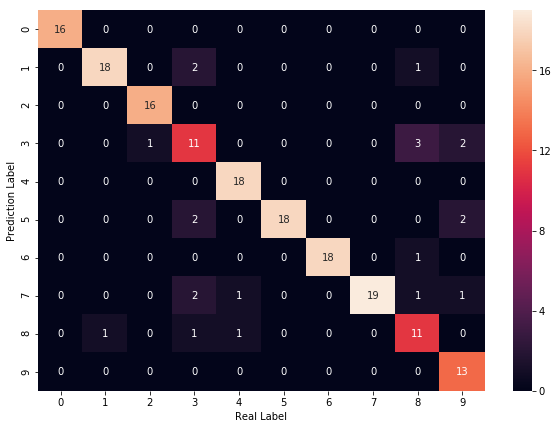

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:56 index:[5] real:5
#1 min_error:74 index:[3] real:2
#2 min_error:74 index:[8] real:8
#3 min_error:13 index:[0] real:0
#4 min_error:57 index:[1] real:1
#5 min_error:49 index:[7] real:7
#6 min_error:26 index:[6] real:6
#7 min_error:54 index:[3] real:3
#8 min_error:32 index:[2] real:2
#9 min_error:54 index:[1] real:1
#10 min_error:64 index:[7] real:7
#11 min_error:82 index:[7] real:4
#12 min_error:36 index:[6] real:6
#13 min_error:57 index:[3] real:3
#14 min_error:51 index:[1] real:1
#15 min_error:64 index:[3] real:3
#16 min_error:80 index:[7] real:9
#17 min_error:55 index:[1] real:1
#18 min_error:67 index:[7] real:7
#19 min_error:17 index:[6] real:6
#20 min_error:70 index:[8] real:8
#21 min_error:39 index:[4] real:4
#22 min_error:50 index:[3] real:3
#23 min_error:58 index:[1] real:1
#24 min_error:38 index:[4] real:4
#25 min_error:21 index:[0] real:0
#26 min_error:43 index:[5] real:5
#27 min_error:48 index:[3] real:3
#28 min_error:45 index:[6] real:6
#29 min_error:67 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9090909090909091
Avg Base Learner:0.7995102040816325


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

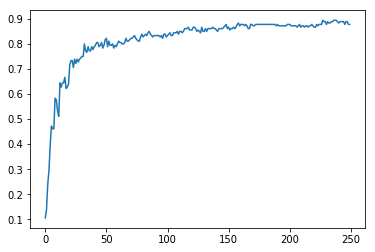

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4591 Total connections::4995
